In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = 'data/color_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = 'data/color_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = 'data/color_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1178 images belonging to 3 classes.
Found 318 images belonging to 3 classes.
Found 316 images belonging to 3 classes.


In [3]:
#Define NN architecture

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(3, activation='softmax'))


piece_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 135, 135, 16)      80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        8256      
__________

In [4]:
# compile the model
piece_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [5]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='baseline_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=100, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.09056, saving model to baseline_model.weights.best.hdf5
2s - loss: 0.6040 - acc: 0.7565 - val_loss: 1.0906 - val_acc: 0.3924
Epoch 2/100
Epoch 00001: val_loss did not improve
1s - loss: 0.3586 - acc: 0.8772 - val_loss: 1.1221 - val_acc: 0.2816
Epoch 3/100
Epoch 00002: val_loss did not improve
1s - loss: 0.2708 - acc: 0.9021 - val_loss: 1.1591 - val_acc: 0.1519
Epoch 4/100
Epoch 00003: val_loss did not improve
1s - loss: 0.2324 - acc: 0.9329 - val_loss: 1.1830 - val_acc: 0.1741
Epoch 5/100
Epoch 00004: val_loss did not improve
1s - loss: 0.1863 - acc: 0.9468 - val_loss: 1.1699 - val_acc: 0.1804
Epoch 6/100
Epoch 00005: val_loss did not improve
1s - loss: 0.2005 - acc: 0.9441 - val_loss: 1.1771 - val_acc: 0.2247
Epoch 7/100
Epoch 00006: val_loss improved from 1.09056 to 1.05115, saving model to baseline_model.weights.best.hdf5
1s - loss: 0.1706 - acc: 0.9569 - val_loss: 1.0511 - val_acc: 0.4430
Epoch 8/100
Epoch 00007: val_loss did

Epoch 00064: val_loss did not improve
1s - loss: 0.0112 - acc: 0.9958 - val_loss: 0.4681 - val_acc: 0.7880
Epoch 66/100
Epoch 00065: val_loss did not improve
1s - loss: 0.0229 - acc: 0.9966 - val_loss: 0.3266 - val_acc: 0.8987
Epoch 67/100
Epoch 00066: val_loss improved from 0.02553 to 0.02079, saving model to baseline_model.weights.best.hdf5
1s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.0208 - val_acc: 0.9905
Epoch 68/100
Epoch 00067: val_loss did not improve
1s - loss: 0.0099 - acc: 0.9983 - val_loss: 0.2958 - val_acc: 0.9367
Epoch 69/100
Epoch 00068: val_loss did not improve
1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0594 - val_acc: 0.9810
Epoch 70/100
Epoch 00069: val_loss did not improve
1s - loss: 0.0046 - acc: 0.9992 - val_loss: 4.2510 - val_acc: 0.7057
Epoch 71/100
Epoch 00070: val_loss did not improve
1s - loss: 0.0099 - acc: 0.9975 - val_loss: 0.0730 - val_acc: 0.9905
Epoch 72/100
Epoch 00071: val_loss did not improve
1s - loss: 0.0143 - acc: 0.9975 - val_loss: 2.4288 - va

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('baseline_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 1.0


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

6/9 [=================>............] - ETA: 0s

In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',


In [11]:
piece_test_iter.filenames

['black/1538778538.3017461.jpg',
 'black/1538779431.4099524.jpg',
 'black/1538776272.1332486.jpg',
 'black/1539023040.9695048.jpg',
 'black/1538776153.1161563.jpg',
 'black/1539025486.6533895.jpg',
 'black/1539017658.0751133_28.jpg',
 'black/1539025921.7744703.jpg',
 'black/1538779519.5865016.jpg',
 'black/1538779739.058273.jpg',
 'black/1539023363.830272.jpg',
 'black/1539023428.3806713.jpg',
 'black/1539017657.8251727_33.jpg',
 'black/1539023228.1371589.jpg',
 'black/1539028085.6649253.jpg',
 'black/1539026872.2657654.jpg',
 'black/1538779127.0457888.jpg',
 'black/1539017656.0015128_29.jpg',
 'black/1539017658.0438766_13.jpg',
 'black/1538778901.7553732.jpg',
 'black/1538778196.1506379.jpg',
 'black/1539024583.6953154.jpg',
 'black/1539022975.1625128.jpg',
 'black/1538778101.779042.jpg',
 'black/1538779439.9036374.jpg',
 'black/1539025391.7579608.jpg',
 'black/1539023017.1607347.jpg',
 'black/1538779919.6389072.jpg',
 'black/1539024430.756946.jpg',
 'black/1539026923.465744.jpg',
 'b

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,black/1538778538.3017461.jpg,black,black
1,black/1538779431.4099524.jpg,black,black
2,black/1538776272.1332486.jpg,black,black
3,black/1539023040.9695048.jpg,black,black
4,black/1538776153.1161563.jpg,black,black
5,black/1539025486.6533895.jpg,black,black
6,black/1539017658.0751133_28.jpg,black,black
7,black/1539025921.7744703.jpg,black,black
8,black/1538779519.5865016.jpg,black,black
9,black/1538779739.058273.jpg,black,black


In [14]:
from sklearn.metrics import classification_report
class_report = classification_report(piece_test_iter.classes,predicted_class_indices)
print(class_report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       143
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00       125

avg / total       1.00      1.00      1.00       318



In [15]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[143   0   0]
 [  0  50   0]
 [  0   0 125]]
{0: 'black', 1: 'square', 2: 'white'}


In [16]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

0.00547184886505


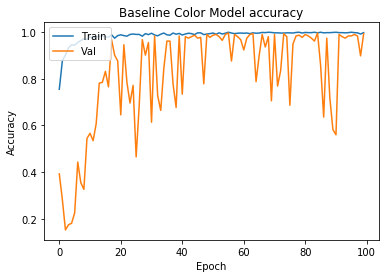

In [20]:
plt.plot(piece_hist.history['acc'])
plt.plot(piece_hist.history['val_acc'])
plt.title('Baseline Color Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

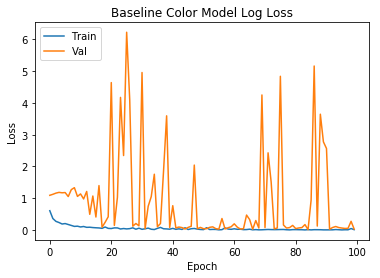

In [21]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Baseline Color Model Log Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

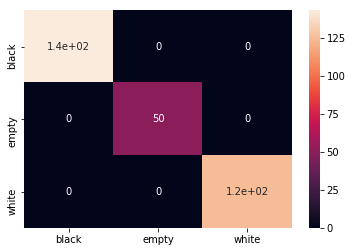

In [19]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['black','empty','white'],yticklabels=['black','empty','white'])